In [1]:
%matplotlib inline

import sys
sys.path.append("../")
from utils import DetectionDataset, draw_rectangle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# \[ 우리가 풀어내야하는 문제 \]
---
---

Toy Dataset으로, 영상 전반에 숫자가 뿌려져 있는 이미지를 구성하였습니다. 무작위로, 크기도 다양한 숫자가 전역에 뿌려져 있습니다. 이를 올바르게 잡고 있는지를 확인해보도록 하겠습니다.

## 1. Dataset 불러오기
---


In [2]:
# DataSet 불러오기
dataset = DetectionDataset(data_type='train')

위의 클래스를 이용하는 방법은 매우 단순합니다. `dataset[index]`를 지칭하면, 아래와 같이 이미지 정보를 담은 `np.ndarray`와 label 정보를 담은 `pd.Series` 정보를 가져오게 됩니다.

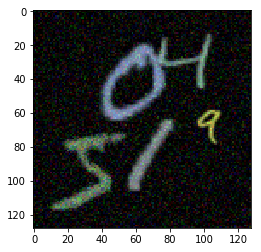

,image_index,cx,cy,w,h,label
0,0,32.0,94.0,46.0,46.0,5
1,0,58.0,42.0,38.0,46.0,0
2,0,89.0,29.5,32.0,33.0,4
3,0,68.5,85.0,29.0,42.0,1
4,0,103.0,68.0,14.0,20.0,9


In [3]:
image, digit_df = dataset[0]

plt.imshow(image)
plt.show()
digit_df

Label 정보는 크게 2개의 정보로 나뉘어져 있습니다. 위치 정보인(cx,cy,w,h)와, 클래스 정보(label)로 나뉘어 집니다.

위와 같이 하나의 데이터를 가져올 수도 있고, 복수개의 데이터를 가져올 수 있습니다.<br>
복수개의 데이터를 가져오는 방식은  `np.ndarray`의 인덱싱 방식과 같이, 리스트로 가져올수도 있고, 슬라이스로 가져올 수도 있습니다. 

In [4]:
images, digit_df = dataset[3:5]
print("image의 갯수 :", len(images))
digit_df

image의 갯수 : 2


,image_index,cx,cy,w,h,label
0,3,61.0,59.0,26.0,32.0,7
1,3,57.0,27.0,34.0,30.0,2
2,3,89.0,38.5,24.0,31.0,8
3,3,80.5,15.0,9.0,18.0,6
4,3,100.5,80.0,19.0,28.0,9
0,4,94.0,77.0,34.0,36.0,4
1,4,45.5,58.0,29.0,32.0,0
2,4,53.5,90.0,11.0,20.0,9


## 2. 좌표 영역 시각화하기
----
`draw_rectangle`를 구현해두었습니다. 이를 통해 우리는 좌표값들이 이미지에서 어떻게 위치하고 있는지를 확인할 수 있습니다.

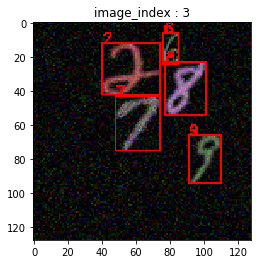

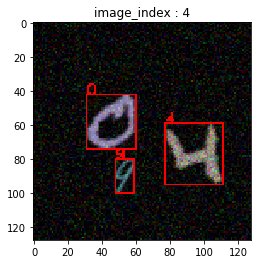

In [5]:
for image, (image_index, df) in zip(images, 
                                    digit_df.groupby('image_index')):
    vis_image = draw_rectangle(image, df)
    plt.title(f"image_index : {image_index}")
    plt.imshow(vis_image)
    plt.show()